## CE9010 Project - Group 4
## Brain Tumour Detection
 Sun Yun Qian Priscila & Lau Zhe Ru Zachary
<hr>

## 1. Problem Description
<hr>

## 2. Data Acquisition
<hr>

__Instructions to use kaggle API to acquire dataset__
1. Create a kaggle account and create new API token. A <q>kaggle.json</q> file will be downloaded. 
2. Place the <q>kaggle.json</q> file under the directory: <q>C:\Users\YourUsername\\.kaggle</q> (Note: Replace <q>YourUsername</q> in the directory with your username).<br><br>

__Alternatively, you can download the dataset directly [here](https://www.kaggle.com/navoneel/brain-mri-images-for-brain-tumor-detection)__ (Note: Save the dataset in the same directory as this notebook).
<hr>

In [1]:
import kaggle

In [2]:
#list datasets in the brain category
!kaggle datasets list -s brain

ref                                                          title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
mateuszbuda/lgg-mri-segmentation                             Brain MRI segmentation                             714MB  2019-05-02 21:32:45           4385        129  0.8235294        
navoneel/brain-mri-images-for-brain-tumor-detection          Brain MRI Images for Brain Tumor Detection          15MB  2019-04-14 15:15:54           7765        158  0.5              
wanghaohan/confused-eeg                                      Confused student EEG brainwave data                109MB  2018-03-28 20:52:52           5267        236  0.7941176        
berkeley-biosense/synchronized-brainwave-dataset             Synchronized Brainw

In [3]:
#list files of a dataset
!kaggle datasets files navoneel/brain-mri-images-for-brain-tumor-detection

name           size  creationDate         
------------  -----  -------------------  
no/14 no.jpg    6KB  2019-04-14 15:15:52  
no/10 no.jpg    4KB  2019-04-14 15:15:52  
no/25 no.jpg    8KB  2019-04-14 15:15:52  
no/22 no.jpg    7KB  2019-04-14 15:15:52  
no/21 no.jpg    6KB  2019-04-14 15:15:52  
no/17 no.jpg    5KB  2019-04-14 15:15:52  
no/28 no.jpg    6KB  2019-04-14 15:15:52  
no/24 no.jpg    6KB  2019-04-14 15:15:52  
no/1 no.jpeg   53KB  2019-04-14 15:15:52  
no/19 no.jpg    6KB  2019-04-14 15:15:52  
no/27 no.jpg    5KB  2019-04-14 15:15:52  
no/13 no.jpg    4KB  2019-04-14 15:15:52  
no/18 no.jpg    6KB  2019-04-14 15:15:52  
no/2 no.jpeg   78KB  2019-04-14 15:15:52  
no/12 no.jpg    4KB  2019-04-14 15:15:52  
no/11 no.jpg    3KB  2019-04-14 15:15:52  
no/20 no.jpg    8KB  2019-04-14 15:15:52  
no/15 no.jpg    7KB  2019-04-14 15:15:52  
no/26 no.jpg    7KB  2019-04-14 15:15:52  
no/23 no.jpg    9KB  2019-04-14 15:15:52  
yes/Y100.JPG   20KB  2019-04-14 15:15:52  
yes/Y11.jpg

In [4]:
#download dataset
!kaggle datasets download navoneel/brain-mri-images-for-brain-tumor-detection --unzip 


  0%|          | 0.00/15.1M [00:00<?, ?B/s]
  7%|6         | 1.00M/15.1M [00:00<00:02, 7.32MB/s]
 13%|#3        | 2.00M/15.1M [00:00<00:01, 7.66MB/s]
 26%|##6       | 4.00M/15.1M [00:00<00:01, 8.34MB/s]
 40%|###9      | 6.00M/15.1M [00:00<00:01, 8.98MB/s]
 46%|####6     | 7.00M/15.1M [00:00<00:00, 8.76MB/s]
 60%|#####9    | 9.00M/15.1M [00:00<00:00, 9.28MB/s]
 66%|######6   | 10.0M/15.1M [00:01<00:00, 9.56MB/s]
 79%|#######9  | 12.0M/15.1M [00:01<00:00, 9.92MB/s]
 86%|########6 | 13.0M/15.1M [00:01<00:00, 9.05MB/s]
 93%|#########2| 14.0M/15.1M [00:01<00:00, 9.25MB/s]
100%|##########| 15.1M/15.1M [00:01<00:00, 9.74MB/s]
100%|##########| 15.1M/15.1M [00:01<00:00, 9.75MB/s]


## Data Exploration & Pre-Processing
<hr>

In [5]:
import time
import random
import sklearn

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os #interact with file systems

import cv2 #pip install opencv-python (image functions)

In [6]:
yes=os.listdir('./brain_tumor_dataset/yes')#returns a list containing the names of the jpg file in the directory
no=os.listdir('./brain_tumor_dataset/no')
print(yes[1])

Y10.jpg


[[[3 3 3]
  [3 3 3]
  [3 3 3]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 [[3 3 3]
  [3 3 3]
  [3 3 3]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 [[3 3 3]
  [3 3 3]
  [3 3 3]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 ...

 [[2 2 2]
  [2 2 2]
  [2 2 2]
  ...
  [2 2 2]
  [3 3 3]
  [3 3 3]]

 [[2 2 2]
  [2 2 2]
  [2 2 2]
  ...
  [1 1 1]
  [1 1 1]
  [2 2 2]]

 [[2 2 2]
  [2 2 2]
  [2 2 2]
  ...
  [1 1 1]
  [1 1 1]
  [2 2 2]]]
image dimensions= (218, 180, 3)


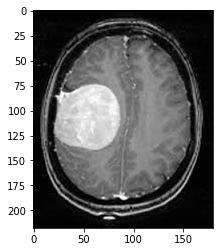

In [7]:
#show one raw training sample
img = cv2.imread('./brain_tumor_dataset/yes/'+yes[0])
#imread() decodes the image into a 3-dimensiomal matrix: (height,width,colour channels)
print(img)
print("image dimensions=",img.shape)
#Height of the raw image is 218 pixels, width is 180 pixels and there are 3 colour channels in the array(Blue, Green and Red)
from matplotlib import pyplot as plt
plt.imshow(img, interpolation='nearest')
plt.show()

In [8]:
#resize all image to the same size (224,224) and place them in lists
X=[]
for file in yes:
    img = cv2.imread('./brain_tumor_dataset/yes/'+file)
    img = cv2.resize(img, (224, 224) )#Height of image is 224 pixels, width is 224 pixels and there are 3 colour channels in the array (Blue,green,red)   
    img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)#convert image to grey scale image
    X.append(img)

for file in no:
    img = cv2.imread('./brain_tumor_dataset/no/'+file)
    img = cv2.resize(img, (224, 224) )
    img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    X.append(img)


image dimensions= (224, 224)


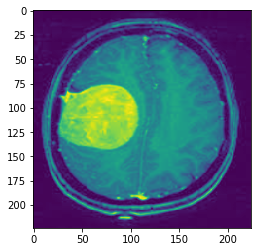

In [9]:
print("image dimensions=",X[0].shape)#an image has height 224, width 224 and there is only 1 dimension for grey scale values
plt.imshow(X[0], interpolation='nearest')

In [10]:
X = np.asarray(X)#convert the list of image matrices to an array
print('Shape of matrix with image stored as matrices(224x224) =',X.shape)

# number of data
n = X.shape[0] 
print('Number of training data=',n)

Shape of matrix with image stored as matrices(224x224) = (253, 224, 224)
Number of training data= 253


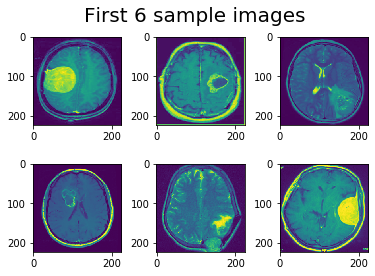

In [11]:
#Visualise
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def plot_images(X,start,end,r,c,title=None):
    """X is an array containing image arrays of size (224,224); r is row; c is column; 
    start is start index; end is end index;
    Output images arrange in grid rxc"""
    fig = plt.figure()
    fig.subplots_adjust(hspace=0.4, wspace=0.4)#adjust spacing between plots
    for i in range(start+1, end+1):#visualise first 6 image
        ax = fig.add_subplot(r, c, i)
        ax.imshow(X[i-1], interpolation='nearest')
    fig.suptitle(title, fontsize=20)
        
plot_images(X,0,6,2,3,"First 6 sample images")


In [12]:
#normalize data
X = X.astype('float32')
X /= 255

In [13]:
#Create y-labels
yes_labels=np.full(len(yes),1)
no_labels=np.full(len(no),0)
y=np.concatenate([yes_labels,no_labels])
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [14]:
#split data: 70% train and 30% test
n=len(X)#total number of image
index = np.arange(0,n,1)
len_train = round(n*0.7)
len_test = n-len_train
print ("total number of data: ",n)
print ("number of train data :",len_train,"number of test data :",len_test)

total number of data:  253
number of train data : 177 number of test data : 76


Shape of matrix with image stored as flattened arrays in rows = (253, 50176)


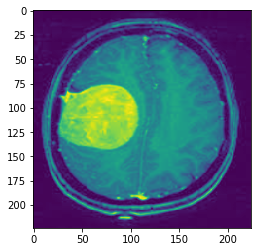

In [15]:
# create matrix with image stored as flattened arrays in rows
X = np.array([X[i].flatten()
              for i in range(n)],'f')
#flatten() converts each image matrix (224,224) to a one-dimensional array of size 224*224=50176 features.
#because sklearn functions takes in training data, X, with shape (n_samples,n_features)

print('Shape of matrix with image stored as flattened arrays in rows =',X.shape)
plt.imshow(X[0].reshape(224,224), interpolation='nearest')#need to reshape flattened arrays to (224x224) to visualise image

In [16]:
#split flattened image data into training set and test set
from random import sample
X_train, X_test= [],[]
y_train, y_test= [],[]
test_index = sample(set(index), len_test)# Prints list of random index of given length len_test
print('test_index=',test_index)

for i in range(n):
    if i in test_index:
        X_test.append(X[i])
        y_test.append(y[i])
    else:
        X_train.append(X[i])
        y_train.append(y[i])

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

X_test = np.asarray(X_test)
y_test = np.asarray(y_test)



test_index= [13, 129, 54, 186, 167, 9, 218, 124, 142, 111, 28, 36, 83, 128, 252, 179, 199, 154, 229, 226, 16, 39, 105, 10, 121, 138, 141, 190, 110, 5, 76, 210, 61, 175, 206, 127, 25, 231, 212, 103, 97, 251, 209, 236, 233, 216, 94, 4, 241, 162, 158, 185, 0, 123, 67, 71, 143, 57, 50, 51, 144, 85, 222, 153, 198, 219, 130, 114, 169, 98, 207, 133, 122, 43, 90, 228]


In [17]:
#check shapes of train and test data

print("Shape of X_train:",X_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_test:",y_test.shape)

Shape of X_train: (177, 50176)
Shape of X_test: (76, 50176)
Shape of y_train: (177,)
Shape of y_test: (76,)


## PCA
<hr>

In [18]:
#PCA
from sklearn.decomposition import PCA
t = time.time()
pca = PCA(svd_solver='randomized')
X_pca = pca.fit_transform(X)
print ('Time: ',time.time()-t)

Time:  2.4559836387634277


In [19]:
#Covariance
#Long run Time:  98.02181911468506
t = time.time()
print(pca.get_covariance().shape)
print('Time: ',time.time()-t)

(50176, 50176)
Time:  76.37749671936035


[0.00287459 0.0029742  0.00263004 ... 0.00414188 0.00421842 0.00420818]
(50176,)
total number of principal components= 253
(253, 224, 224)


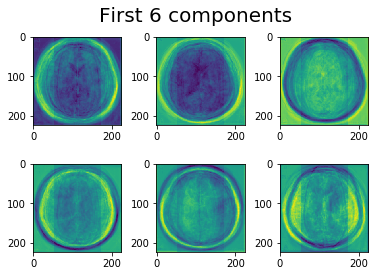

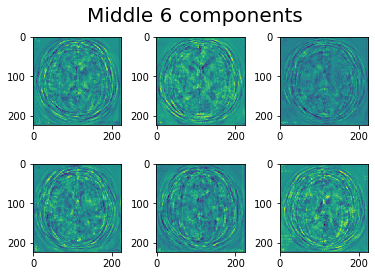

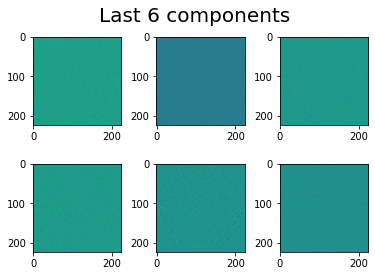

In [20]:
print(pca.components_[0])
print(pca.components_[0].shape)
n_pca=pca.components_[:].shape[0]
print("total number of principal components=",n_pca)
#plt.imshow(pca.components_[0].reshape(224,224), interpolation='nearest')


#create an array containing all principal components of size (224,224) because plot_images takes an array containing image matrices of size (224,224) as input
prin_comp=[]
for i in range(n_pca):
    prin_comp.append(pca.components_[i].reshape(224,224))
prin_comp=np.asarray(prin_comp)
print(prin_comp.shape)


plot_images(prin_comp[:6],0,6,2,3,"First 6 components")
plot_images(prin_comp[(int)(n_pca/2)-6:(int)(n_pca/2)],0,6,2,3,"Middle 6 components")
plot_images(prin_comp[n_pca-6:n_pca],0,6,2,3,"Last 6 components")

In [21]:
#variance
k = 0
var = 0
while var < 0.95 :
    var = var + pca.explained_variance_ratio_[k]
    k = k + 1
k -= 1

print('k=',k)
print('captured variance=',var)

k= 131
captured variance= 0.9503933985251933


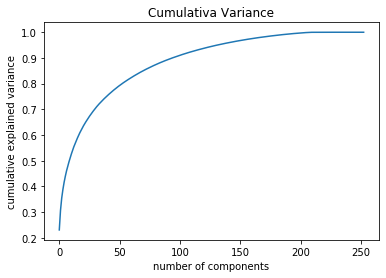

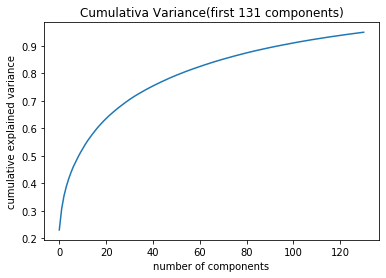

In [22]:
#Cumulative variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.title('Cumulativa Variance')
plt.show()
plt.plot(np.cumsum(pca.explained_variance_ratio_[:k]))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.title('Cumulativa Variance(first %i components)' %k)
plt.show()

In [23]:
#run PCA with k components
t = time.time()
pca = PCA(n_components = k, svd_solver='randomized')
X_pca = pca.fit_transform(X)#returns training data with shape (n_samples, n_components=k)
projected = pca.inverse_transform(X_pca)#transform training data with only first k principal components back to its original space, with shape (n_samples, n_features)
print('Time: ',time.time()-t)

Time:  2.0687601566314697


In [24]:
print(X_pca.shape)#reduced to k features
print(projected.shape)
print(X.shape)

(253, 131)
(253, 50176)
(253, 50176)


(177, 224, 224)
k= 131
(177, 224, 224)


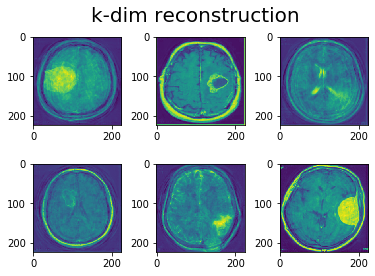

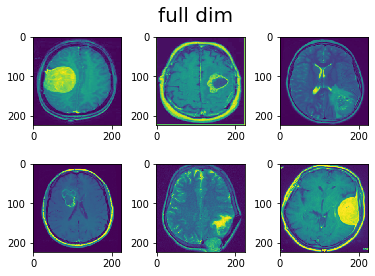

In [25]:
#Visualise the reconstructed sample images from only the first k principal components 

#create an array containing image matrices of size (224,224) because plot_images takes an array containing image matrices of size (224,224) as input
proj_img=[]
for i in range(len_train):#len_train=number of training data
    proj_img.append(projected[i].reshape(224,224))
proj_img=np.asarray(proj_img)
print(proj_img.shape)

#Show principle components
print("k=",k)
plot_images(proj_img[:6],0,6,2,3,"k-dim reconstruction")#plot first 6 sample images from training data (k-dimension)

#Visualise first 6 sample images from training data (full dimension)

#create an array containing image matrices of size (224,224) because plot_images takes an array containing image matrices of size (224,224) as input
X_img=[]
for i in range(len_train):#len_train=number of training data
    X_img.append(X[i].reshape(224,224))
X_img=np.asarray(X_img)
print(X_img.shape)

#Show first 6 sample images from training data (full dim)
plot_images(X_img[:6],0,6,2,3,"full dim")


In [26]:
#split flattened image data with reduced dimensions (PCA) into training set and test set
from random import sample
X_train_pca, X_test_pca= [],[]
print('test_index=',test_index)
#use the same indexes for both X_test and X_test_pca to generate the same image data for both test sets
#only difference will be the dimensions/number of features for each image data
#labels in both train and test set after dimensionality reduction(PCA) will remain the same as the orginal train and test set

for i in range(n):
    if i in test_index:
        X_test_pca.append(X_pca[i])

    else:
        X_train_pca.append(X_pca[i])

X_train_pca = np.asarray(X_train_pca)
X_test_pca = np.asarray(X_test_pca)


test_index= [13, 129, 54, 186, 167, 9, 218, 124, 142, 111, 28, 36, 83, 128, 252, 179, 199, 154, 229, 226, 16, 39, 105, 10, 121, 138, 141, 190, 110, 5, 76, 210, 61, 175, 206, 127, 25, 231, 212, 103, 97, 251, 209, 236, 233, 216, 94, 4, 241, 162, 158, 185, 0, 123, 67, 71, 143, 57, 50, 51, 144, 85, 222, 153, 198, 219, 130, 114, 169, 98, 207, 133, 122, 43, 90, 228]


In [27]:
#check shapes of train and test data

print("Shape of X_train_pca:",X_train_pca.shape)
print("Shape of X_test_pca:",X_test_pca.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_test:",y_test.shape)

Shape of X_train_pca: (177, 131)
Shape of X_test_pca: (76, 131)
Shape of y_train: (177,)
Shape of y_test: (76,)


## Unsupervised Classification - K-means
<hr>

### K-means Clustering with PCA

In [28]:
# Compute Accuracy
def compute_accuracy(y_pred,y):
    diff = (y_pred == y).astype('int')
    accuracy = sum(diff)/ y.shape[0]
    
    return accuracy

In [29]:
#if class labels are reversed
def reverse(y_kmeans):
    where_0 = np.where(y_kmeans == 0)
    where_1 = np.where(y_kmeans == 1)

    y_kmeans[where_0] = 1
    y_kmeans[where_1] = 0
    return y_kmeans
    
    

In [30]:
print('k=',k)
print('Shape of X_train_pca=',X_train_pca.shape)

k= 131
Shape of X_train_pca= (177, 131)


In [31]:
#K means Clustering
t = time.time()
from sklearn.cluster import KMeans
def kmeans_random(X_train_pca,k):
    L_iters= np.zeros(100)#record kmeans loss values
    #c_iters= np.zeros((100,2,k))#record 2 centroids, with k dimension each
    clust_iters= np.zeros((100,X_train_pca.shape[0]))#record clusters
    for i in range(100):#repeat kmeans algorithm 100 times with random initialisation
        kmeans = KMeans(n_clusters=2, init='random',n_init=1)#initialise random centroids 
        kmeans.fit(X_train_pca)#compute kmeans clustering
        y_kmeans_pca = kmeans.predict(X_train_pca)#compute kmeans prediction labels
        L_iters[i]=kmeans.inertia_/y_kmeans_pca.shape[0]#save current kmeans loss values
        #c_iters[i]=kmeans.cluster_centers_#save current centroids
        clust_iters[i]=y_kmeans_pca#save current clusters
        print('iter=',i+1,'; Kmeans loss=',L_iters[i])
    return L_iters, clust_iters
       
L_iters, clust_iters=kmeans_random(X_train_pca,k)#input X_train_pca with shape (177,k) 
print('Time: ',time.time()-t)

iter= 1 ; Kmeans loss= 1582.8166279129564
iter= 2 ; Kmeans loss= 1588.6897336553002
iter= 3 ; Kmeans loss= 1584.7673180722823
iter= 4 ; Kmeans loss= 1584.7673180722823
iter= 5 ; Kmeans loss= 1588.8712496161468
iter= 6 ; Kmeans loss= 1582.8166279129564
iter= 7 ; Kmeans loss= 1582.8166279129564
iter= 8 ; Kmeans loss= 1588.6897336553002
iter= 9 ; Kmeans loss= 1588.6897336553002
iter= 10 ; Kmeans loss= 1588.8712496161468
iter= 11 ; Kmeans loss= 1582.8166279129564
iter= 12 ; Kmeans loss= 1582.6019865886803
iter= 13 ; Kmeans loss= 1588.8712496161468
iter= 14 ; Kmeans loss= 1582.8166279129564
iter= 15 ; Kmeans loss= 1588.6897336553002
iter= 16 ; Kmeans loss= 1588.6897336553002
iter= 17 ; Kmeans loss= 1865.1088354319334
iter= 18 ; Kmeans loss= 1588.6897336553002
iter= 19 ; Kmeans loss= 1588.6897336553002
iter= 20 ; Kmeans loss= 1582.8166279129564
iter= 21 ; Kmeans loss= 1582.8166279129564
iter= 22 ; Kmeans loss= 1582.8166279129564
iter= 23 ; Kmeans loss= 1582.8166279129564
iter= 24 ; Kmeans lo

In [32]:
#find index of the minimum kmeans loss
L_iters=list(L_iters)#convert array L_iters to list so that we can use list functions as below
index=L_iters.index(min(L_iters))
print('min kmeans loss=',min(L_iters))
print('min index=',index)

min kmeans loss= 1582.6019865886803
min index= 11


In [33]:
#pick the solution with min kmeans loss value
y_kmeans_pca=clust_iters[index]
y_kmeans_pca=y_kmeans_pca.astype('int32')
print(y_kmeans_pca)

[0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1
 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0
 0 1 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1
 1 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1
 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1]


In [34]:
#kmeans is a form of unsupervised clustering. Therfore, class labels may be swapped during the clustering process.  
#If accuracy is less than 50%, it is likely that the labels are swapped.
if compute_accuracy(y_kmeans_pca,y_train)<0.5:
    y_kmeans_pca=reverse(y_kmeans_pca)

In [35]:
#kmeans prediction labels
print(y_kmeans_pca)

[1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0
 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0
 0 0 1 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0]


In [36]:
#actual labels
print(y_train)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [37]:
#compute accuracy
print('accuracy (with pca)=',compute_accuracy(y_kmeans_pca,y_train))

accuracy (with pca)= 0.6271186440677966


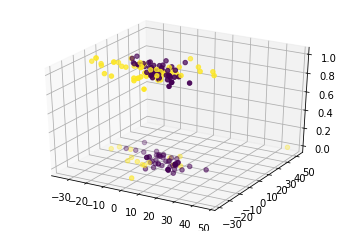

In [38]:
#3D plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs =X_train_pca[:, 1] , ys =  X_train_pca[:,2], zs= y_train ,s=20, c=y_kmeans_pca, depthshade=True)

### K-means Clustering without PCA

In [39]:
print('Shape of X_train=',X_train.shape)

Shape of X_train= (177, 50176)


In [40]:
#K means clustering
#Note:long runtime (93 seconds) compared to with pca
t = time.time()
L_iters, clust_iters=kmeans_random(X_train,X_train.shape[1])
print('Time: ',time.time()-t)

iter= 1 ; Kmeans loss= 1694.9319140596922
iter= 2 ; Kmeans loss= 1688.8542817423122
iter= 3 ; Kmeans loss= 1694.9319140596922
iter= 4 ; Kmeans loss= 1695.0321812258828
iter= 5 ; Kmeans loss= 1694.9319140596922
iter= 6 ; Kmeans loss= 1689.0623350010742
iter= 7 ; Kmeans loss= 1694.9319140596922
iter= 8 ; Kmeans loss= 1689.0623350010742
iter= 9 ; Kmeans loss= 1694.9319140596922
iter= 10 ; Kmeans loss= 1694.9319140596922
iter= 11 ; Kmeans loss= 1689.0623350010742
iter= 12 ; Kmeans loss= 1688.8542817423122
iter= 13 ; Kmeans loss= 1688.7947476550066
iter= 14 ; Kmeans loss= 1694.9319140596922
iter= 15 ; Kmeans loss= 1694.9319140596922
iter= 16 ; Kmeans loss= 1689.0623350010742
iter= 17 ; Kmeans loss= 1689.0623350010742
iter= 18 ; Kmeans loss= 1688.7947476550066
iter= 19 ; Kmeans loss= 1689.0623350010742
iter= 20 ; Kmeans loss= 1688.8746473132958
iter= 21 ; Kmeans loss= 1689.0623350010742
iter= 22 ; Kmeans loss= 1695.087427103572
iter= 23 ; Kmeans loss= 1688.8746473132958
iter= 24 ; Kmeans los

In [41]:
#find index of the minimum kmeans loss
L_iters=list(L_iters)
index=L_iters.index(min(L_iters))
print('min kmeans loss=',min(L_iters))
print('min index=',index)

min kmeans loss= 1688.7947476550066
min index= 12


In [42]:
#pick the solution with min kmeans loss value
y_kmeans=clust_iters[index]
y_kmeans=y_kmeans.astype('int32')
print(y_kmeans)

[0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1
 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0
 0 1 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1
 1 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1
 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1]


In [43]:
#kmeans is a form of unsupervised clustering. Therfore, class labels may be swapped during the clustering process.  
#If accuracy is less than 50%, it is likely that the labels are swapped.
if compute_accuracy(y_kmeans,y_train)<0.5:
    y_kmeans=reverse(y_kmeans)

In [44]:
#kmeans prediction labels
print(y_kmeans)

[1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0
 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0
 0 0 1 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0]


In [45]:
#actual labels
print(y_train)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [46]:
#compute accuracy
print('accuracy (no pca)=',compute_accuracy(y_kmeans,y_train))
#In general, applying PCA before building a model will NOT help to make the model perform better (in terms of accuracy)!
#This is because PCA is an algorithm that does not consider the response variable / prediction target into account. PCA will treat the feature has large variance as important features, but the feature has large variance can have noting to do with the prediction target.
#This means, you can produce a lot of useless features and eliminate useful features after PCA.
#Instead, The main benefit to PCA is reducing the size of your feature vectors for computational efficiency. 
#PCA is used to remove the least beneficial features so you have a smaller data set, but without losing too much predictive power.


accuracy (no pca)= 0.632768361581921


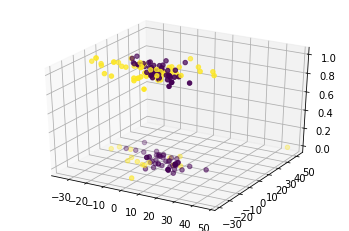

In [47]:
#3D plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs =X_train_pca[:, 1] , ys =  X_train_pca[:,2], zs= y_train ,s=20, c=y_kmeans, depthshade=True)

### K-means ++ Clustering with PCA

In [48]:
print('k=',k)
print('Shape of X_train_pca=',X_train_pca.shape)

k= 131
Shape of X_train_pca= (177, 131)


In [49]:
#K means++ clustering
t = time.time()
from sklearn.cluster import KMeans
def kmeans_plus(X_train_pca,k):
    L_iters= np.zeros(100)#record kmeans loss values
    #c_iters= np.zeros((100,2,k))#record 2 centroids, with k dimension each
    clust_iters= np.zeros((100,X_train_pca.shape[0]))#record clusters
    for i in range(100):#repeat kmeans algorithm 100 times with random initialisation of first centroid
        kmeans = KMeans(n_clusters=2, init='k-means++',n_init=1)#initialise with kmeans++ 
        kmeans.fit(X_train_pca)#compute kmeans clustering
        y_kmeans_pca = kmeans.predict(X_train_pca)#compute kmeans prediction labels
        L_iters[i]=kmeans.inertia_/y_kmeans_pca.shape[0]#save current kmeans loss values
        #c_iters[i]=kmeans.cluster_centers_#save current centroids
        clust_iters[i]=y_kmeans_pca#save current clusters
        print('iter=',i+1,'; Kmeans loss=',L_iters[i])
    return L_iters, clust_iters
       
L_iters, clust_iters=kmeans_plus(X_train_pca,k)#input X_train_pca with shape (177,k) 
print('Time: ',time.time()-t)

iter= 1 ; Kmeans loss= 1587.8339311834977
iter= 2 ; Kmeans loss= 1582.8166279129564
iter= 3 ; Kmeans loss= 1584.7673180722823
iter= 4 ; Kmeans loss= 1588.6897336553002
iter= 5 ; Kmeans loss= 1588.6897336553002
iter= 6 ; Kmeans loss= 1588.6897336553002
iter= 7 ; Kmeans loss= 1582.6019865886803
iter= 8 ; Kmeans loss= 1584.7673180722823
iter= 9 ; Kmeans loss= 1588.6897336553002
iter= 10 ; Kmeans loss= 1587.8236870977962
iter= 11 ; Kmeans loss= 1588.6897336553002
iter= 12 ; Kmeans loss= 1582.8166279129564
iter= 13 ; Kmeans loss= 1582.8166279129564
iter= 14 ; Kmeans loss= 1588.6897336553002
iter= 15 ; Kmeans loss= 1588.6897336553002
iter= 16 ; Kmeans loss= 1588.6897336553002
iter= 17 ; Kmeans loss= 1588.6897336553002
iter= 18 ; Kmeans loss= 1582.6019865886803
iter= 19 ; Kmeans loss= 1582.6019865886803
iter= 20 ; Kmeans loss= 1775.900754304606
iter= 21 ; Kmeans loss= 1582.8166279129564
iter= 22 ; Kmeans loss= 1584.7673180722823
iter= 23 ; Kmeans loss= 1588.6897336553002
iter= 24 ; Kmeans los

In [50]:
#find index of the minimum kmeans loss
L_iters=list(L_iters)#convert array L_iters to list so that we can use list functions as below
index=L_iters.index(min(L_iters))
print('min kmeans loss=',min(L_iters))
print('min index=',index)

min kmeans loss= 1582.5501165348667
min index= 49


In [51]:
#pick the solution with min kmeans loss value
y_kmeans_pca=clust_iters[index]
y_kmeans_pca=y_kmeans_pca.astype('int32')
print(y_kmeans_pca)

[1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0
 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0
 0 0 1 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0]


In [52]:
#kmeans is a form of unsupervised clustering. Therfore, class labels may be swapped during the clustering process.  
#If accuracy is less than 50%, it is likely that the labels are swapped.
if compute_accuracy(y_kmeans_pca,y_train)<0.5:
    y_kmeans_pca=reverse(y_kmeans_pca)

In [53]:
#kmeans prediction labels
print(y_kmeans_pca)

[1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0
 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0
 0 0 1 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0]


In [54]:
#actual labels
print(y_train)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [55]:
#compute accuracy
print('accuracy (with pca)=',compute_accuracy(y_kmeans_pca,y_train))

accuracy (with pca)= 0.632768361581921


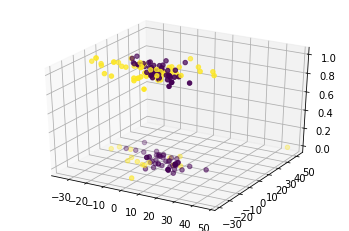

In [56]:
#3D plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs =X_train_pca[:, 1] , ys =  X_train_pca[:,2], zs= y_train ,s=20, c=y_kmeans_pca, depthshade=True)

## Supervised classification - Logistic Regression
<hr>

In [57]:
#logistic regression----------------------------------------------------------------------------------------
# create X matrix for train set
X_train_lr = np.ones([X_train.shape[0],X_train.shape[1]+1])
X_train_lr[:,1:X_train.shape[1]+1] = X_train
print(X_train_lr.shape)
#print(X_train_lr)

# create X matrix for test set
X_test_lr = np.ones([X_test.shape[0],X_test.shape[1]+1])
X_test_lr[:,1:X_test.shape[1]+1] = X_test
print(X_test_lr.shape)
#print(X_test_lr)

# sigmoid function
def sigmoid(z):
    sigmoid_f = 1 / (1 + np.exp(-z))
    return sigmoid_f 

# linear predictive function
def f_pred(X,w): 
    p = sigmoid(X.dot(w))
    return p

# loss function definition
def loss_logreg(y_pred,y): 
    n = len(y)
    loss = (-1/n)* ( y.T.dot(np.log(y_pred)) + (1-y).T.dot(np.log(1-y_pred)) )
    return loss

(177, 50177)
(76, 50177)


In [58]:
# run logistic regression with scikit-learn without PCA for train set
from sklearn.linear_model import LogisticRegression
start = time.time()
logreg_sklearn = LogisticRegression(C=1e6) # scikit-learn logistic regression
logreg_sklearn.fit(X_train, y_train) # learn the model parameters with K principal components (X_train_pca=(n_samples, n_compenents) for training data)
print('Time=',time.time() - start)

# logistic regression on train set
y_logreg_train = logreg_sklearn.predict(X_train)
print('accuracy of train set (no pca)=',compute_accuracy(y_logreg_train[:,None],y_train[:,None]))
print('loss of train set (no pca)=',loss_logreg(y_logreg_train,y_train)) # loss for train set without using linear predictive function

# finding w after sklearn
w_train = np.zeros([X_train_lr.shape[1],1])
w_train[0,0] = logreg_sklearn.intercept_
w_train[1:,0] = logreg_sklearn.coef_
print(w_train)
y_pred = f_pred(X_train_lr,w_train)
y_pred = y_pred.astype('float32')
print(y_pred)
print('loss of train set (no pca)=',loss_logreg(y_pred,y_train)) # loss for train set using linear predictive function

Time= 0.5925052165985107
accuracy of train set (no pca)= [1.]
loss of train set (no pca)= nan
[[-0.20032808]
 [-0.01337392]
 [-0.00312313]
 ...
 [ 0.010506  ]
 [ 0.01294755]
 [ 0.02671975]]
[[1.00000000e+00]
 [1.00000000e+00]
 [9.99999940e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [9.99999523e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [9.99999881e-01]
 [1.00000000e+00]
 [9.99999940e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [9.99999881e-01]
 [1.00000000e+00]
 [9.99999583e-01]
 [1.00000000e+00]
 [9.99999046e-01]
 [1.00000000e+00]
 [9.99996841e-01]
 [9.99994457e-01]
 [1.00000000e+00]
 [9.99999285e-01]
 [9.99998033e-01]


C:\Users\psyq9\Miniconda3\envs\CE9010_2020\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log


In [59]:
# run logistic regression with scikit-learn without PCA for test set

y_logreg_test = logreg_sklearn.predict(X_test)
print('accuracy of test set (no pca)=',compute_accuracy(y_logreg_test,y_test))
print('loss of test set (no pca)=',loss_logreg(y_logreg_test,y_test))
#print(y_logreg_test,y_test, sep='\n')

print('loss of train set (no pca)=',loss_logreg(f_pred(X_test_lr,w_train),y_test)) # loss for train set using linear predictive function
#print(f_pred(X_test_lr,w_train), y_logreg_test, len(y_test))

accuracy of test set (no pca)= 0.7631578947368421
loss of test set (no pca)= nan
loss of train set (no pca)= [nan]


C:\Users\psyq9\Miniconda3\envs\CE9010_2020\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log


In [60]:
# logistic regression on train set with PCA
from sklearn.linear_model import LogisticRegression
start = time.time()
logreg_sklearn_pca = LogisticRegression(C=1e6) # scikit-learn logistic regression
logreg_sklearn_pca.fit(X_train_pca, y_train) # learn the model parameters with k=101 principal components (X_train_pca=(n_samples, n_compenents) for training data)
print('Time=',time.time() - start)
y_logreg_train_pca = logreg_sklearn_pca.predict(X_train_pca)
print('accuracy of train set (with pca)=',compute_accuracy(y_logreg_train_pca,y_train))
print(X_train_pca.shape, X_test_pca.shape, X_test.shape)


Time= 0.01496267318725586
accuracy of train set (with pca)= 1.0
(177, 131) (76, 131) (76, 50176)


In [61]:
# run logistic regression with scikit-learn with PCA for test set
y_logreg_test_pca = logreg_sklearn_pca.predict(X_test_pca)
#print(X_test_pca.shape)
print('accuracy of test set (with pca)=',compute_accuracy(y_logreg_test_pca,y_test))

accuracy of test set (with pca)= 0.7105263157894737


## Neural Networks?
<hr>

In [62]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical
from keras.models import Model
from keras.optimizers import Adam

from keras.applications.vgg16 import VGG16

#y_train = to_categorical(y_train)
#y_test = to_categorical(y_test)

Using TensorFlow backend.
